,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


Columns with missing values > 5%:
Comments    100.0
dtype: float64


C:\Users\tes's\AppData\Local\Temp\ipykernel_19852\1015181338.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\tes's\AppData\Local\Temp\ipykernel_19852\1015181338.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Text(0, 0.5, 'Tamb')

c:\Users\tes's\Desktop\K_AIM\Week 0\solar-challenge-week1\week0\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


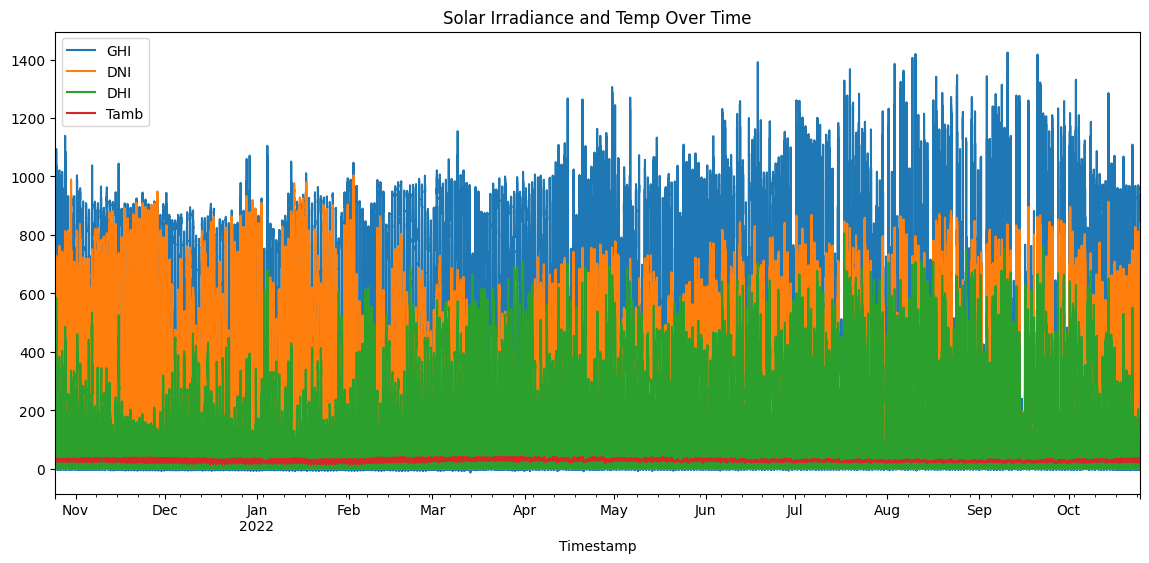

c:\Users\tes's\Desktop\K_AIM\Week 0\solar-challenge-week1\week0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


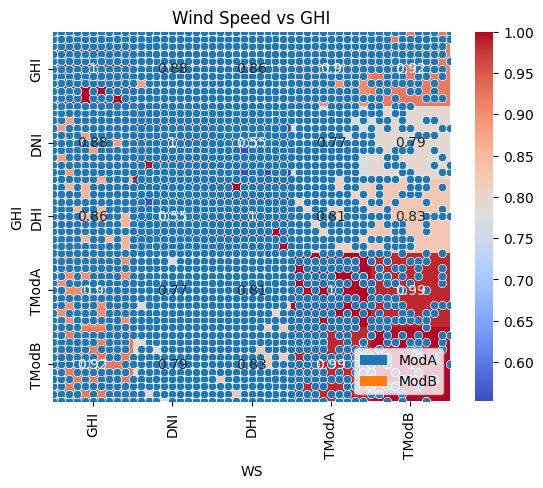

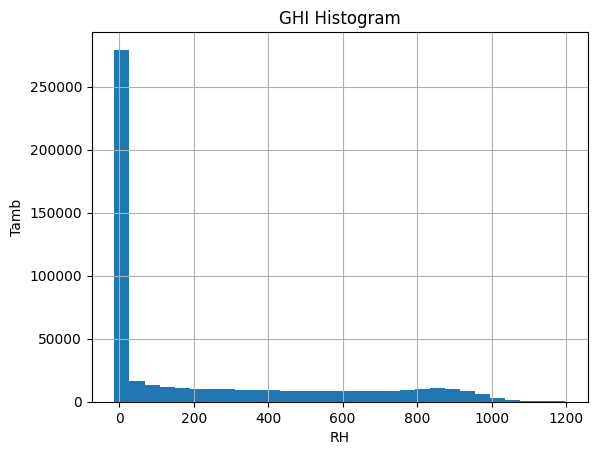

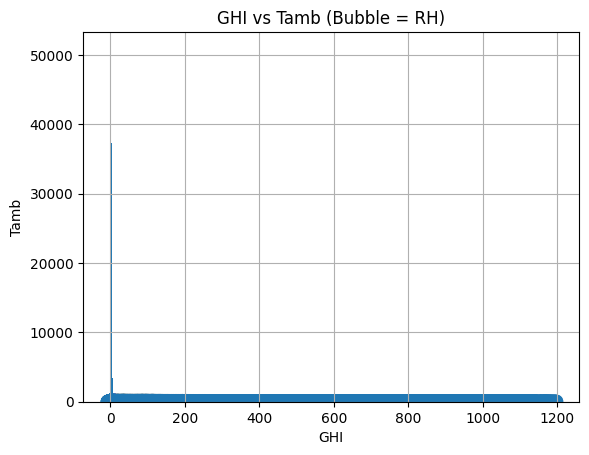

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the data
df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

# --- Summary Statistics & Missing Values ---
display(df.describe())
missing = df.isna().sum()
print("Columns with missing values > 5%:")
print((missing / len(df) * 100)[(missing / len(df)) > 0.05])

# --- Outlier Detection ---
z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_cols].apply(zscore)
df['outlier'] = (z_scores.abs() > 3).any(axis=1)

# --- Cleaning: Impute or drop ---
for col in z_cols:
    df[col].fillna(df[col].median(), inplace=True)

df_clean = df[~df['outlier']].copy()

# --- Export Cleaned Data ---
df_clean.to_csv('../data/togo_clean.csv', index=False)

# --- Time Series Plot ---
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6), title='Solar Irradiance and Temp Over Time')

# --- Cleaning Effect ---
df['cleaned'] = ~df['outlier']
df.groupby('cleaned')[['ModA', 'ModB']].mean().plot(kind='bar', title='Average ModA and ModB Pre/Post Cleaning')

# --- Correlation Heatmap ---
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# --- Scatter Plots ---
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title('Wind Speed vs GHI')
plt.figure()
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('RH vs Tamb')

# --- Histograms ---
df_clean['GHI'].hist(bins=30)
plt.title('GHI Histogram')
plt.figure()
df_clean['WS'].hist(bins=30)
plt.title('WS Histogram')

# --- Bubble Chart ---
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.title('GHI vs Tamb (Bubble = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')